In [22]:
import glob
import numpy as np
import os
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Dense, Dropout,Flatten,Activation,Average
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model,load_model
from keras.callbacks import ModelCheckpoint
from keras import Sequential
from sklearn.metrics import accuracy_score
import random


In [23]:
def loadDataH5():
    with h5py.File('data1.h5','r') as hf: 
        trainX = np.array(hf.get('trainX')) 
        trainY = np.array(hf.get('trainY')) 
        valX = np.array(hf.get('valX')) 
        valY = np.array(hf.get('valY')) 
        print (trainX.shape,trainY.shape) 
        print (valX.shape,valY.shape)
    return trainX, trainY, valX, valY 

trainX, trainY, valX, valY = loadDataH5()

(1020, 128, 128, 3) (1020,)
(340, 128, 128, 3) (340,)


# Ensemble technique 1 (Model Averaging on different model structure) 

In [24]:

def model1(classes, model_input):

    
    model = Sequential()
    
    model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same',activation ='relu', input_shape = model_input))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    
    model.add(Conv2D(filters =64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(filters =128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(32, activation = "relu"))
    model.add(Dense(classes, activation = "softmax"))
    return model

In [25]:
def model2(class_label,model_input):

    
    model = Sequential()
    
    model.add(Conv2D(filters = 16, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = model_input))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    
    model.add(Conv2D(filters =64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(filters =128, kernel_size = (1,1),padding = 'Same',activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(filters =32, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(Conv2D(filters =64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(filters =96, kernel_size = (1,1),padding = 'Same',activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(64, activation = "relu"))
    model.add(Dropout(0.4))
    model.add(Dense(class_label, activation = "softmax"))
    return model

In [26]:
def model3(class_label,model_input):

    
    model = Sequential()
  
    model.add(Conv2D(filters = 16, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = model_input))
    model.add(MaxPooling2D(pool_size=(2,2)))
   
    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu'))
  
    model.add(Conv2D(filters =32, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(Conv2D(filters =64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(filters =64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(Conv2D(filters =64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    
    model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(Conv2D(filters =128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(Conv2D(filters =128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(Conv2D(filters =512, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(128, activation='tanh'))
    model.add(Dropout(0.5)) 
    model.add(Dense(class_label, activation = "softmax"))
    return model

In [27]:
def model4(class_label,model_input):
    model = Sequential()
    
    model.add(Conv2D(filters = 16, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = model_input))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(filters = 32, kernel_size = (1,1),padding = 'Same',activation ='relu'))
    
    model.add(Conv2D(filters =64, kernel_size = (1,1),padding = 'Same',activation ='relu'))
    model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(filters =128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu'))
    model.add(Conv2D(filters =32, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(Conv2D(filters =64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(filters =64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(Conv2D(filters =64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    
    model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(Conv2D(filters =128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(Conv2D(filters =128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    model.add(Conv2D(filters =512, kernel_size = (3,3),padding = 'Same',activation ='relu'))
    
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(256, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(class_label, activation = "softmax"))
    return model

In [28]:
def showGraph(Histroy, epochs):
    # plot the training loss and accuracy
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0, epochs), Histroy.history["loss"], label="train_loss")
    plt.plot(np.arange(0, epochs), Histroy.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, epochs), Histroy.history["accuracy"], label="train_acc")
    plt.plot(np.arange(0, epochs), Histroy.history["val_accuracy"], label="val_acc")
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend()
    plt.show()

In [29]:
def train_model(model,fileName,epochs, trainX=trainX, trainY=trainY, valX=valX, valY=valY):
    #trainX, trainY, valX, valY = loadDataH5()
    model.compile(optimizer=SGD(lr=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    filepath = str(fileName)+".h5"
    checkpoint = ModelCheckpoint(filepath, monitor="val_loss", mode="min", save_best_only=True, verbose=1)
    history = model.fit(x = trainX, y = trainY, batch_size = 32, epochs = epochs,callbacks=[checkpoint], validation_data = (valX, valY))
    print(history)
    showGraph(history,epochs)
    return str(fileName)+".h5"

In [30]:
def evaluate(model):
    scores = model.evaluate(valX, valY, verbose=0)
    print("Test Loss: {0}, Test Accuracy:{1}".format(scores[0],scores[1]))
    return scores
    

In [31]:
def ensemble_prediction(models):
    predictions = []
    for model in models: 
        predictions.append(model.predict_proba(valX))
    predict_Avg= np.array(predictions)
    result=np.argmax(np.sum(predict_Avg/len(models), axis=0),axis=1)
    score = accuracy_score(valY, result, normalize=True)
    print("Ensemble accuracy Score: ",score)
    return score


In [ ]:
trainX, trainY, valX, valY = loadDataH5()
classes = 17
epochs = 30
models_list = []
score_list = []

#************ Model 1 *****************

model1 = model1(classes, trainX.shape[1:])
#print(model1.summary())
model1_weight_file = train_model(model1, fileName='model1',epochs=epochs)
model1.load_weights(model1_weight_file)
models_list.append(model1)
result_1 = evaluate(model1)
score_list.append(result_1)

#************ Model 2 *****************

model2 = model2(classes,trainX.shape[1:])
#print(model2.summary())
model2_weight_file = train_model(model2, fileName='model2',epochs=epochs)
model2.load_weights(model2_weight_file)
models_list.append(model2)
result_2 = evaluate(model2)
score_list.append(result_2)

#************ Model 3 *****************

model3 = model3(classes,trainX.shape[1:])
#print(model3.summary())
model3_weight_file = train_model(model3, fileName='model3',epochs=epochs)
model3.load_weights(model3_weight_file)
models_list.append(model3)
result_3 = evaluate(model3)
score_list.append(result_3)

#************ Model 4 *****************

model4 = model4(classes,trainX.shape[1:])
#print(model4.summary())
model4_weight_file = train_model(model4, fileName='model4',epochs=epochs)
model4.load_weights(model4_weight_file)
models_list.append(model4)
result_4 = evaluate(model4)
score_list.append(result_4)


print("#"*50)
ensembleScore = ensemble_prediction(models_list)

#print("ensembleScore: ", ensembleScore)

(1020, 128, 128, 3) (1020,)
(340, 128, 128, 3) (340,)
Train on 1020 samples, validate on 340 samples
Epoch 1/30
 320/1020 [========>.....................] - ETA: 10s - loss: 2.8337 - accuracy: 0.0531

# Ensemble technique 2 (Model Averaging on same model structure – 10 models with random initialization) 

(1020, 128, 128, 3) (1020,)
(340, 128, 128, 3) (340,)
classes 17
Inpur shape (128, 128, 3)
Train on 1020 samples, validate on 340 samples
Epoch 1/30
1020/1020 [==============================] - 15s 14ms/step - loss: 2.8320 - accuracy: 0.0892 - val_loss: 2.8256 - val_accuracy: 0.0706

Epoch 00001: val_loss improved from inf to 2.82557, saving model to model1_take0.h5
Epoch 2/30
1020/1020 [==============================] - 14s 13ms/step - loss: 2.8269 - accuracy: 0.0882 - val_loss: 2.8210 - val_accuracy: 0.0853

Epoch 00002: val_loss improved from 2.82557 to 2.82098, saving model to model1_take0.h5
Epoch 3/30
1020/1020 [==============================] - 13s 12ms/step - loss: 2.8217 - accuracy: 0.1000 - val_loss: 2.8136 - val_accuracy: 0.1324

Epoch 00003: val_loss improved from 2.82098 to 2.81362, saving model to model1_take0.h5
Epoch 4/30
1020/1020 [==============================] - 13s 13ms/step - loss: 2.8119 - accuracy: 0.1373 - val_loss: 2.7973 - val_accuracy: 0.1647

Epoch 00004: v

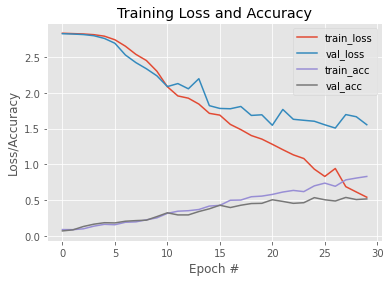

Test Loss: 1.5074979333316578, Test Accuracy:0.4882352948188782
classes 17
Inpur shape (128, 128, 3)
Train on 1020 samples, validate on 340 samples
Epoch 1/30
1020/1020 [==============================] - 15s 15ms/step - loss: 2.8336 - accuracy: 0.0598 - val_loss: 2.8301 - val_accuracy: 0.0529

Epoch 00001: val_loss improved from inf to 2.83006, saving model to model1_take1.h5
Epoch 2/30
1020/1020 [==============================] - 13s 13ms/step - loss: 2.8286 - accuracy: 0.0608 - val_loss: 2.8268 - val_accuracy: 0.0529

Epoch 00002: val_loss improved from 2.83006 to 2.82680, saving model to model1_take1.h5
Epoch 3/30
1020/1020 [==============================] - 13s 13ms/step - loss: 2.8245 - accuracy: 0.0608 - val_loss: 2.8221 - val_accuracy: 0.0529

Epoch 00003: val_loss improved from 2.82680 to 2.82211, saving model to model1_take1.h5
Epoch 4/30
1020/1020 [==============================] - 13s 13ms/step - loss: 2.8164 - accuracy: 0.0618 - val_loss: 2.8123 - val_accuracy: 0.0529

Epoc

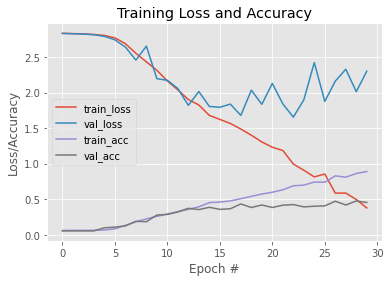

Test Loss: 1.6536599369610057, Test Accuracy:0.42352941632270813
classes 17
Inpur shape (128, 128, 3)
Train on 1020 samples, validate on 340 samples
Epoch 1/30
1020/1020 [==============================] - 15s 15ms/step - loss: 2.8280 - accuracy: 0.0510 - val_loss: 2.8089 - val_accuracy: 0.0912

Epoch 00001: val_loss improved from inf to 2.80886, saving model to model1_take2.h5
Epoch 2/30
1020/1020 [==============================] - 13s 13ms/step - loss: 2.7881 - accuracy: 0.1029 - val_loss: 2.7494 - val_accuracy: 0.1265

Epoch 00002: val_loss improved from 2.80886 to 2.74945, saving model to model1_take2.h5
Epoch 3/30
1020/1020 [==============================] - 13s 13ms/step - loss: 2.6965 - accuracy: 0.1235 - val_loss: 2.6040 - val_accuracy: 0.1353

Epoch 00003: val_loss improved from 2.74945 to 2.60398, saving model to model1_take2.h5
Epoch 4/30
1020/1020 [==============================] - 13s 13ms/step - loss: 2.5105 - accuracy: 0.1549 - val_loss: 2.3237 - val_accuracy: 0.2000

Epo

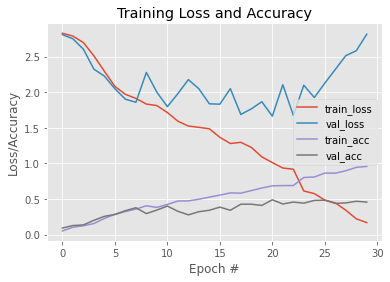

Test Loss: 1.6634846322676715, Test Accuracy:0.4882352948188782
classes 17
Inpur shape (128, 128, 3)
Train on 1020 samples, validate on 340 samples
Epoch 1/30
1020/1020 [==============================] - 16s 15ms/step - loss: 2.8321 - accuracy: 0.0745 - val_loss: 2.8256 - val_accuracy: 0.0941

Epoch 00001: val_loss improved from inf to 2.82557, saving model to model1_take3.h5
Epoch 2/30
1020/1020 [==============================] - 15s 14ms/step - loss: 2.8231 - accuracy: 0.0716 - val_loss: 2.8117 - val_accuracy: 0.1059

Epoch 00002: val_loss improved from 2.82557 to 2.81175, saving model to model1_take3.h5
Epoch 3/30
1020/1020 [==============================] - 15s 14ms/step - loss: 2.8005 - accuracy: 0.1324 - val_loss: 2.7744 - val_accuracy: 0.1647

Epoch 00003: val_loss improved from 2.81175 to 2.77445, saving model to model1_take3.h5
Epoch 4/30
1020/1020 [==============================] - 14s 14ms/step - loss: 2.7217 - accuracy: 0.1647 - val_loss: 2.6214 - val_accuracy: 0.1794

Epoc

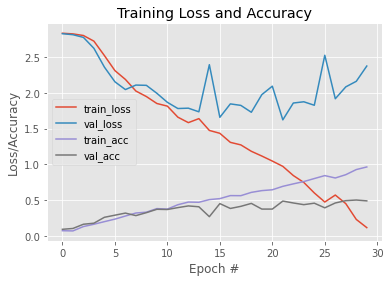

Test Loss: 1.6226304685368258, Test Accuracy:0.4882352948188782
classes 17
Inpur shape (128, 128, 3)
Train on 1020 samples, validate on 340 samples
Epoch 1/30
1020/1020 [==============================] - 15s 14ms/step - loss: 2.8296 - accuracy: 0.0814 - val_loss: 2.8188 - val_accuracy: 0.1294

Epoch 00001: val_loss improved from inf to 2.81880, saving model to model1_take4.h5
Epoch 2/30
1020/1020 [==============================] - 14s 14ms/step - loss: 2.8071 - accuracy: 0.1020 - val_loss: 2.7904 - val_accuracy: 0.1118

Epoch 00002: val_loss improved from 2.81880 to 2.79037, saving model to model1_take4.h5
Epoch 3/30
1020/1020 [==============================] - 14s 14ms/step - loss: 2.7507 - accuracy: 0.1363 - val_loss: 2.6814 - val_accuracy: 0.1324

Epoch 00003: val_loss improved from 2.79037 to 2.68140, saving model to model1_take4.h5
Epoch 4/30
1020/1020 [==============================] - 14s 13ms/step - loss: 2.5962 - accuracy: 0.1569 - val_loss: 2.4451 - val_accuracy: 0.1765

Epoc

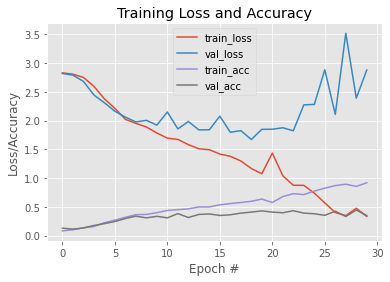

Test Loss: 1.6707889360540054, Test Accuracy:0.40882351994514465
classes 17
Inpur shape (128, 128, 3)
Train on 1020 samples, validate on 340 samples
Epoch 1/30
1020/1020 [==============================] - 15s 14ms/step - loss: 2.8308 - accuracy: 0.0608 - val_loss: 2.8221 - val_accuracy: 0.0618

Epoch 00001: val_loss improved from inf to 2.82208, saving model to model1_take5.h5
Epoch 2/30
1020/1020 [==============================] - 13s 13ms/step - loss: 2.8161 - accuracy: 0.1020 - val_loss: 2.8078 - val_accuracy: 0.1235

Epoch 00002: val_loss improved from 2.82208 to 2.80783, saving model to model1_take5.h5
Epoch 3/30
1020/1020 [==============================] - 13s 13ms/step - loss: 2.7886 - accuracy: 0.1147 - val_loss: 2.7706 - val_accuracy: 0.1294

Epoch 00003: val_loss improved from 2.80783 to 2.77065, saving model to model1_take5.h5
Epoch 4/30
1020/1020 [==============================] - 13s 13ms/step - loss: 2.7339 - accuracy: 0.1412 - val_loss: 2.7048 - val_accuracy: 0.1235

Epo

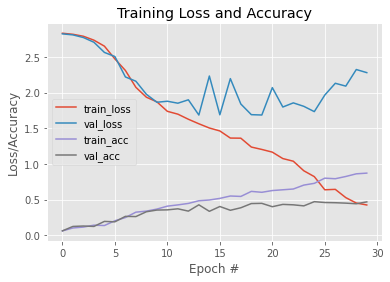

Test Loss: 1.6845492741640877, Test Accuracy:0.4264705777168274
classes 17
Inpur shape (128, 128, 3)
Train on 1020 samples, validate on 340 samples
Epoch 1/30
1020/1020 [==============================] - 15s 15ms/step - loss: 2.8325 - accuracy: 0.0637 - val_loss: 2.8261 - val_accuracy: 0.0441

Epoch 00001: val_loss improved from inf to 2.82613, saving model to model1_take6.h5
Epoch 2/30
1020/1020 [==============================] - 13s 13ms/step - loss: 2.8185 - accuracy: 0.0627 - val_loss: 2.8141 - val_accuracy: 0.0441

Epoch 00002: val_loss improved from 2.82613 to 2.81413, saving model to model1_take6.h5
Epoch 3/30
1020/1020 [==============================] - 14s 14ms/step - loss: 2.7968 - accuracy: 0.0735 - val_loss: 2.7846 - val_accuracy: 0.0559

Epoch 00003: val_loss improved from 2.81413 to 2.78464, saving model to model1_take6.h5
Epoch 4/30
1020/1020 [==============================] - 14s 13ms/step - loss: 2.7486 - accuracy: 0.1186 - val_loss: 2.7472 - val_accuracy: 0.0559

Epoc

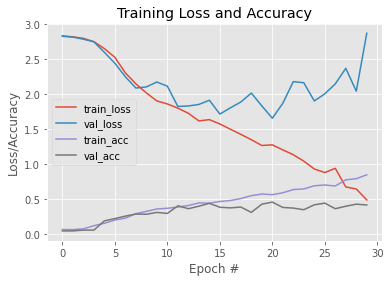

Test Loss: 1.6546067630543428, Test Accuracy:0.45588234066963196
classes 17
Inpur shape (128, 128, 3)
Train on 1020 samples, validate on 340 samples
Epoch 1/30
1020/1020 [==============================] - 15s 15ms/step - loss: 2.8317 - accuracy: 0.0637 - val_loss: 2.8289 - val_accuracy: 0.0735

Epoch 00001: val_loss improved from inf to 2.82887, saving model to model1_take7.h5
Epoch 2/30
1020/1020 [==============================] - 14s 14ms/step - loss: 2.8214 - accuracy: 0.0980 - val_loss: 2.8187 - val_accuracy: 0.0971

Epoch 00002: val_loss improved from 2.82887 to 2.81866, saving model to model1_take7.h5
Epoch 3/30
1020/1020 [==============================] - 13s 13ms/step - loss: 2.8028 - accuracy: 0.1186 - val_loss: 2.7879 - val_accuracy: 0.1294

Epoch 00003: val_loss improved from 2.81866 to 2.78795, saving model to model1_take7.h5
Epoch 4/30
1020/1020 [==============================] - 14s 14ms/step - loss: 2.7456 - accuracy: 0.1471 - val_loss: 2.6704 - val_accuracy: 0.1324

Epo

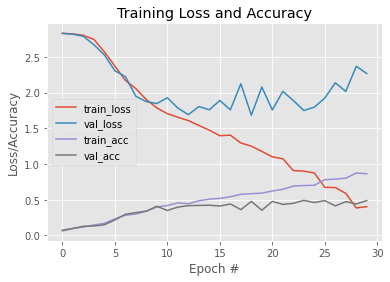

Test Loss: 1.6848933738820693, Test Accuracy:0.47647058963775635
classes 17
Inpur shape (128, 128, 3)
Train on 1020 samples, validate on 340 samples
Epoch 1/30
1020/1020 [==============================] - 15s 14ms/step - loss: 2.8317 - accuracy: 0.0735 - val_loss: 2.8250 - val_accuracy: 0.0559

Epoch 00001: val_loss improved from inf to 2.82499, saving model to model1_take8.h5
Epoch 2/30
1020/1020 [==============================] - 14s 14ms/step - loss: 2.8200 - accuracy: 0.1039 - val_loss: 2.8150 - val_accuracy: 0.0794

Epoch 00002: val_loss improved from 2.82499 to 2.81504, saving model to model1_take8.h5
Epoch 3/30
1020/1020 [==============================] - 13s 13ms/step - loss: 2.8018 - accuracy: 0.1020 - val_loss: 2.8012 - val_accuracy: 0.0676

Epoch 00003: val_loss improved from 2.81504 to 2.80119, saving model to model1_take8.h5
Epoch 4/30
1020/1020 [==============================] - 13s 13ms/step - loss: 2.7800 - accuracy: 0.1127 - val_loss: 2.7548 - val_accuracy: 0.1500

Epo

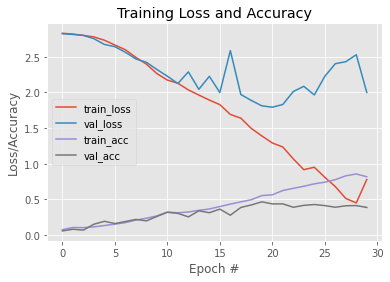

Test Loss: 1.7927892095902387, Test Accuracy:0.43529412150382996
classes 17
Inpur shape (128, 128, 3)
Train on 1020 samples, validate on 340 samples
Epoch 1/30
1020/1020 [==============================] - 16s 15ms/step - loss: 2.8306 - accuracy: 0.0725 - val_loss: 2.8279 - val_accuracy: 0.1000

Epoch 00001: val_loss improved from inf to 2.82787, saving model to model1_take9.h5
Epoch 2/30
1020/1020 [==============================] - 14s 14ms/step - loss: 2.8226 - accuracy: 0.0922 - val_loss: 2.8165 - val_accuracy: 0.1000

Epoch 00002: val_loss improved from 2.82787 to 2.81648, saving model to model1_take9.h5
Epoch 3/30
1020/1020 [==============================] - 13s 13ms/step - loss: 2.8051 - accuracy: 0.1000 - val_loss: 2.7885 - val_accuracy: 0.1147

Epoch 00003: val_loss improved from 2.81648 to 2.78849, saving model to model1_take9.h5
Epoch 4/30
1020/1020 [==============================] - 14s 14ms/step - loss: 2.7559 - accuracy: 0.1245 - val_loss: 2.7043 - val_accuracy: 0.0971

Epo

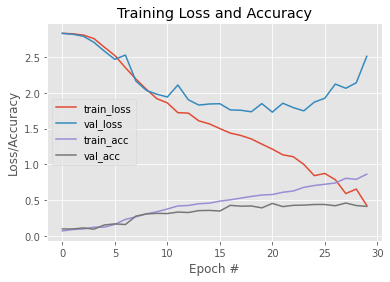

Test Loss: 1.729932524176205, Test Accuracy:0.45588234066963196
Ensemble accuracy Score:  0.5147058823529411


In [32]:
trainX, trainY, valX, valY = loadDataH5()
classes = 17
epochs = 30
models_list = []
score_list = []
input_shape = trainX.shape[1:]

#************ Model 1 *****************
for i in range(10):   
    print("classes",classes)
    print("Inpur shape",input_shape)
    models_list.append(model1(classes, input_shape))
    #print(model1.summary())
    model1_weight_file = train_model(models_list[i], fileName='model1_take'+str(i),epochs=epochs)
    models_list[i].load_weights(model1_weight_file)
    #models_list.append(model1)
    result_1 = evaluate(models_list[i])
    score_list.append(result_1)
    
ensembleScore = ensemble_prediction(models_list)

# Ensemble technique 3 (Random Training Subset Ensemble) 

(1020, 128, 128, 3) (1020,)
(340, 128, 128, 3) (340,)
Train on 510 samples, validate on 340 samples
Epoch 1/30
510/510 [==============================] - 10s 19ms/step - loss: 2.8338 - accuracy: 0.0667 - val_loss: 2.8303 - val_accuracy: 0.0618

Epoch 00001: val_loss improved from inf to 2.83027, saving model to model1_take0.h5
Epoch 2/30
510/510 [==============================] - 7s 15ms/step - loss: 2.8283 - accuracy: 0.0647 - val_loss: 2.8284 - val_accuracy: 0.0882

Epoch 00002: val_loss improved from 2.83027 to 2.82844, saving model to model1_take0.h5
Epoch 3/30
510/510 [==============================] - 7s 15ms/step - loss: 2.8208 - accuracy: 0.0961 - val_loss: 2.8253 - val_accuracy: 0.0794

Epoch 00003: val_loss improved from 2.82844 to 2.82531, saving model to model1_take0.h5
Epoch 4/30
510/510 [==============================] - 7s 14ms/step - loss: 2.8137 - accuracy: 0.1020 - val_loss: 2.8199 - val_accuracy: 0.0853

Epoch 00004: val_loss improved from 2.82531 to 2.81986, saving 

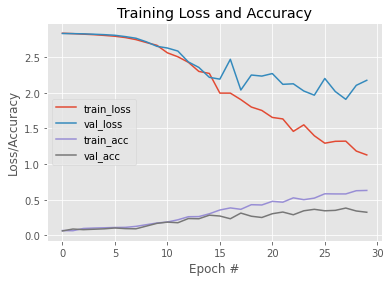

Test Loss: 1.9070106366101434, Test Accuracy:0.38235294818878174
Train on 510 samples, validate on 340 samples
Epoch 1/30
510/510 [==============================] - 8s 16ms/step - loss: 2.8338 - accuracy: 0.0569 - val_loss: 2.8322 - val_accuracy: 0.0471

Epoch 00001: val_loss improved from inf to 2.83220, saving model to model1_take1.h5
Epoch 2/30
510/510 [==============================] - 7s 14ms/step - loss: 2.8307 - accuracy: 0.0608 - val_loss: 2.8304 - val_accuracy: 0.0735

Epoch 00002: val_loss improved from 2.83220 to 2.83035, saving model to model1_take1.h5
Epoch 3/30
510/510 [==============================] - 7s 14ms/step - loss: 2.8274 - accuracy: 0.0804 - val_loss: 2.8279 - val_accuracy: 0.0941

Epoch 00003: val_loss improved from 2.83035 to 2.82794, saving model to model1_take1.h5
Epoch 4/30
510/510 [==============================] - 8s 15ms/step - loss: 2.8241 - accuracy: 0.0941 - val_loss: 2.8246 - val_accuracy: 0.0853

Epoch 00004: val_loss improved from 2.82794 to 2.8246

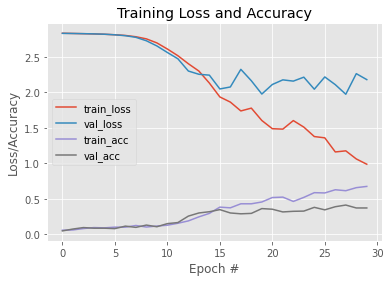

Test Loss: 1.9737094318165498, Test Accuracy:0.4117647111415863
Train on 510 samples, validate on 340 samples
Epoch 1/30
510/510 [==============================] - 9s 17ms/step - loss: 2.8344 - accuracy: 0.0647 - val_loss: 2.8330 - val_accuracy: 0.0824

Epoch 00001: val_loss improved from inf to 2.83303, saving model to model1_take2.h5
Epoch 2/30
510/510 [==============================] - 8s 15ms/step - loss: 2.8321 - accuracy: 0.0784 - val_loss: 2.8314 - val_accuracy: 0.0618

Epoch 00002: val_loss improved from 2.83303 to 2.83141, saving model to model1_take2.h5
Epoch 3/30
510/510 [==============================] - 8s 16ms/step - loss: 2.8301 - accuracy: 0.0745 - val_loss: 2.8296 - val_accuracy: 0.0618

Epoch 00003: val_loss improved from 2.83141 to 2.82957, saving model to model1_take2.h5
Epoch 4/30
510/510 [==============================] - 8s 15ms/step - loss: 2.8279 - accuracy: 0.0765 - val_loss: 2.8278 - val_accuracy: 0.0618

Epoch 00004: val_loss improved from 2.82957 to 2.82780

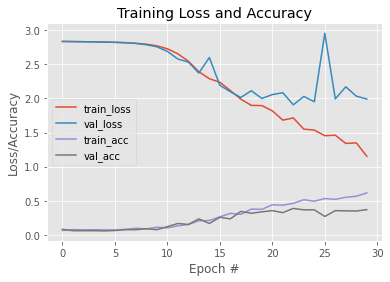

Test Loss: 1.9055257152108585, Test Accuracy:0.38823530077934265
Train on 510 samples, validate on 340 samples
Epoch 1/30
510/510 [==============================] - 9s 17ms/step - loss: 2.8278 - accuracy: 0.0569 - val_loss: 2.8331 - val_accuracy: 0.0441

Epoch 00001: val_loss improved from inf to 2.83314, saving model to model1_take3.h5
Epoch 2/30
510/510 [==============================] - 8s 15ms/step - loss: 2.8186 - accuracy: 0.0647 - val_loss: 2.8308 - val_accuracy: 0.0412

Epoch 00002: val_loss improved from 2.83314 to 2.83084, saving model to model1_take3.h5
Epoch 3/30
510/510 [==============================] - 7s 14ms/step - loss: 2.8087 - accuracy: 0.0706 - val_loss: 2.8252 - val_accuracy: 0.0441

Epoch 00003: val_loss improved from 2.83084 to 2.82516, saving model to model1_take3.h5
Epoch 4/30
510/510 [==============================] - 7s 15ms/step - loss: 2.7939 - accuracy: 0.0745 - val_loss: 2.8138 - val_accuracy: 0.0412

Epoch 00004: val_loss improved from 2.82516 to 2.8138

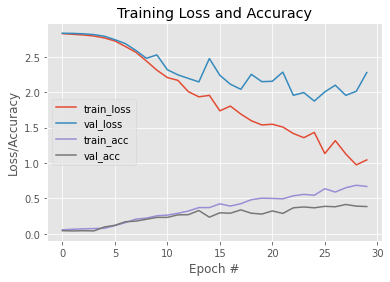

Test Loss: 1.8752256000743193, Test Accuracy:0.36764705181121826
Train on 510 samples, validate on 340 samples
Epoch 1/30
510/510 [==============================] - 9s 17ms/step - loss: 2.8351 - accuracy: 0.0471 - val_loss: 2.8321 - val_accuracy: 0.1029

Epoch 00001: val_loss improved from inf to 2.83214, saving model to model1_take4.h5
Epoch 2/30
510/510 [==============================] - 8s 15ms/step - loss: 2.8298 - accuracy: 0.0784 - val_loss: 2.8299 - val_accuracy: 0.1118

Epoch 00002: val_loss improved from 2.83214 to 2.82985, saving model to model1_take4.h5
Epoch 3/30
510/510 [==============================] - 8s 15ms/step - loss: 2.8251 - accuracy: 0.0922 - val_loss: 2.8275 - val_accuracy: 0.0853

Epoch 00003: val_loss improved from 2.82985 to 2.82749, saving model to model1_take4.h5
Epoch 4/30
510/510 [==============================] - 8s 15ms/step - loss: 2.8213 - accuracy: 0.0725 - val_loss: 2.8235 - val_accuracy: 0.1206

Epoch 00004: val_loss improved from 2.82749 to 2.8234

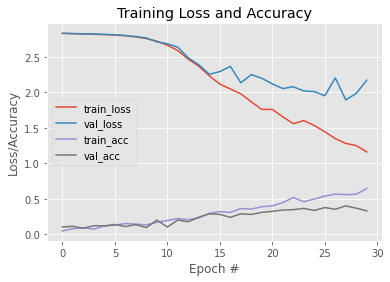

Test Loss: 1.894566218993243, Test Accuracy:0.4000000059604645
Train on 510 samples, validate on 340 samples
Epoch 1/30
510/510 [==============================] - 9s 18ms/step - loss: 2.8322 - accuracy: 0.0902 - val_loss: 2.8298 - val_accuracy: 0.1088

Epoch 00001: val_loss improved from inf to 2.82976, saving model to model1_take5.h5
Epoch 2/30
510/510 [==============================] - 8s 15ms/step - loss: 2.8275 - accuracy: 0.1020 - val_loss: 2.8264 - val_accuracy: 0.1088

Epoch 00002: val_loss improved from 2.82976 to 2.82639, saving model to model1_take5.h5
Epoch 3/30
510/510 [==============================] - 7s 15ms/step - loss: 2.8225 - accuracy: 0.1078 - val_loss: 2.8221 - val_accuracy: 0.1118

Epoch 00003: val_loss improved from 2.82639 to 2.82211, saving model to model1_take5.h5
Epoch 4/30
510/510 [==============================] - 7s 14ms/step - loss: 2.8167 - accuracy: 0.1235 - val_loss: 2.8159 - val_accuracy: 0.1235

Epoch 00004: val_loss improved from 2.82211 to 2.81590,

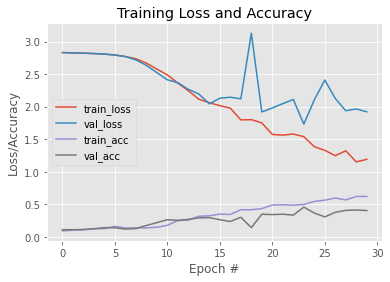

Test Loss: 1.7308338305529427, Test Accuracy:0.45588234066963196
Train on 510 samples, validate on 340 samples
Epoch 1/30
510/510 [==============================] - 9s 18ms/step - loss: 2.8325 - accuracy: 0.0549 - val_loss: 2.8270 - val_accuracy: 0.0735

Epoch 00001: val_loss improved from inf to 2.82702, saving model to model1_take6.h5
Epoch 2/30
510/510 [==============================] - 8s 15ms/step - loss: 2.8264 - accuracy: 0.0804 - val_loss: 2.8225 - val_accuracy: 0.0618

Epoch 00002: val_loss improved from 2.82702 to 2.82250, saving model to model1_take6.h5
Epoch 3/30
510/510 [==============================] - 7s 14ms/step - loss: 2.8199 - accuracy: 0.0686 - val_loss: 2.8169 - val_accuracy: 0.0735

Epoch 00003: val_loss improved from 2.82250 to 2.81695, saving model to model1_take6.h5
Epoch 4/30
510/510 [==============================] - 8s 15ms/step - loss: 2.8112 - accuracy: 0.0725 - val_loss: 2.8054 - val_accuracy: 0.0794

Epoch 00004: val_loss improved from 2.81695 to 2.8053

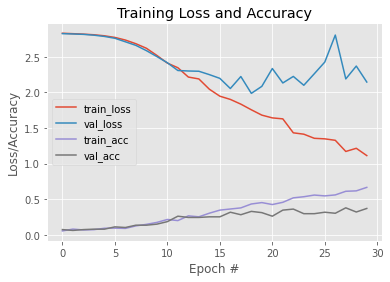

Test Loss: 1.9877777520348043, Test Accuracy:0.3294117748737335
Train on 510 samples, validate on 340 samples
Epoch 1/30
510/510 [==============================] - 9s 18ms/step - loss: 2.8372 - accuracy: 0.0510 - val_loss: 2.8308 - val_accuracy: 0.0353

Epoch 00001: val_loss improved from inf to 2.83075, saving model to model1_take7.h5
Epoch 2/30
510/510 [==============================] - 8s 16ms/step - loss: 2.8261 - accuracy: 0.0588 - val_loss: 2.8274 - val_accuracy: 0.1088

Epoch 00002: val_loss improved from 2.83075 to 2.82738, saving model to model1_take7.h5
Epoch 3/30
510/510 [==============================] - 8s 15ms/step - loss: 2.8180 - accuracy: 0.0863 - val_loss: 2.8140 - val_accuracy: 0.1000

Epoch 00003: val_loss improved from 2.82738 to 2.81404, saving model to model1_take7.h5
Epoch 4/30
510/510 [==============================] - 7s 14ms/step - loss: 2.8066 - accuracy: 0.1059 - val_loss: 2.8023 - val_accuracy: 0.1647

Epoch 00004: val_loss improved from 2.81404 to 2.80234

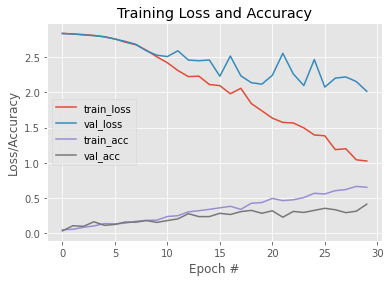

Test Loss: 2.0140374127556298, Test Accuracy:0.41470587253570557
Train on 510 samples, validate on 340 samples
Epoch 1/30
510/510 [==============================] - 9s 18ms/step - loss: 2.8354 - accuracy: 0.0471 - val_loss: 2.8332 - val_accuracy: 0.0706

Epoch 00001: val_loss improved from inf to 2.83324, saving model to model1_take8.h5
Epoch 2/30
510/510 [==============================] - 7s 14ms/step - loss: 2.8256 - accuracy: 0.0922 - val_loss: 2.8280 - val_accuracy: 0.0618

Epoch 00002: val_loss improved from 2.83324 to 2.82796, saving model to model1_take8.h5
Epoch 3/30
510/510 [==============================] - 7s 14ms/step - loss: 2.8220 - accuracy: 0.0941 - val_loss: 2.8263 - val_accuracy: 0.0735

Epoch 00003: val_loss improved from 2.82796 to 2.82632, saving model to model1_take8.h5
Epoch 4/30
510/510 [==============================] - 8s 15ms/step - loss: 2.8141 - accuracy: 0.0961 - val_loss: 2.8178 - val_accuracy: 0.1000

Epoch 00004: val_loss improved from 2.82632 to 2.8177

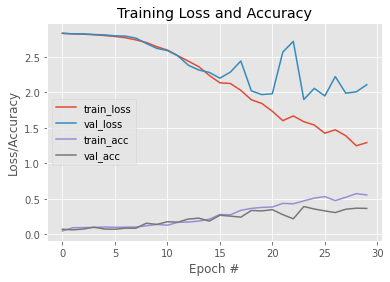

Test Loss: 1.9008780900169822, Test Accuracy:0.3911764621734619
Train on 510 samples, validate on 340 samples
Epoch 1/30
510/510 [==============================] - 9s 18ms/step - loss: 2.8356 - accuracy: 0.0529 - val_loss: 2.8323 - val_accuracy: 0.0529

Epoch 00001: val_loss improved from inf to 2.83225, saving model to model1_take9.h5
Epoch 2/30
510/510 [==============================] - 8s 15ms/step - loss: 2.8226 - accuracy: 0.0627 - val_loss: 2.8278 - val_accuracy: 0.0676

Epoch 00002: val_loss improved from 2.83225 to 2.82784, saving model to model1_take9.h5
Epoch 3/30
510/510 [==============================] - 7s 14ms/step - loss: 2.8131 - accuracy: 0.0843 - val_loss: 2.8229 - val_accuracy: 0.0765

Epoch 00003: val_loss improved from 2.82784 to 2.82293, saving model to model1_take9.h5
Epoch 4/30
510/510 [==============================] - 7s 14ms/step - loss: 2.8012 - accuracy: 0.0843 - val_loss: 2.8106 - val_accuracy: 0.0765

Epoch 00004: val_loss improved from 2.82293 to 2.81055

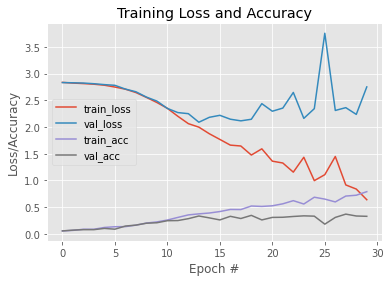

Test Loss: 2.0889132499694822, Test Accuracy:0.3323529362678528
Ensemble accuracy Score:  0.48823529411764705


In [34]:
trainX, trainY, valX, valY = loadDataH5()
size = trainX.shape[0]
classes = 17
epochs = 30
models_list = []
score_list = []
input_shape = trainX.shape[1:]

#************ Model 1 *****************
for i in range(10):
    random_list = random.sample(range(size), int(size*0.5))
    newTrainX = trainX[random_list]
    newTrainY = trainY[random_list]
    models_list.append(model1(classes, input_shape))
    model1_weight_file = train_model(models_list[i], fileName='model1_take'+str(i),epochs=epochs, trainX=newTrainX, trainY=newTrainY)
    models_list[i].load_weights(model1_weight_file)
    result_1 = evaluate(models_list[i])
    score_list.append(result_1)
    
ensembleScore = ensemble_prediction(models_list)